In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 180)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("seizure.csv")
df2 = df.copy()

# Data visualization

In [3]:
#lets see how this looks
print(df.shape)
df.head()

(11500, 180)


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,5,47,80,101,88,73,69,41,-13,-31,-61,-80,-77,-66,-43,5,87,129,121,88,12,-76,-150,-207,-186,-165,-148,-103,-33,40,94,75,8,-81,-155,-227,-262,-233,-218,-187,-126,-65,-12,27,61,49,9,-46,-124,-210,-281,-265,-181,-89,-4,53,53,38,43,31,34,9,-7,-34,-70,-84,-101,-70,-11,42,62,66,74,64,59,56,36,-11,-30,-43,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,283,301,308,285,252,215,194,169,111,-74,-388,-679,-892,-949,-972,-1001,-1006,-949,-847,-668,-432,-153,72,226,326,392,461,495,513,511,496,479,453,440,427,414,399,385,385,404,432,444,437,418,392,373,363,365,372,385,388,383,371,360,353,334,303,252,200,153,151,143,48,-206,-548,-859,-1067,-1069,-957,-780,-597,-460,-357,-276,-224,-210,-350,-930,-1413,-1716,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,-57,-38,-40,-36,-31,-13,11,19,9,-20,-48,-71,-71,-57,-32,-13,6,29,27,25,10,-7,-36,-47,-37,-36,-22,-32,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,-64,-77,-80,-77,-78,-56,-34,-5,10,5,-5,-44,-75,-99,-110,-104,-103,-94,-105,-108,-110,-99,-89,-82,-76,-80,-90,-106,-106,-108,-87,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,-74,-70,-71,-82,-88,-93,-97,-89,-87,-83,-70,-50,-37,-31,-32,-39,-54,-64,-68,-67,-69,-63,-60,-63,-55,-43,-37,-27,-31,-35,-47,-58,-63,-74,-73,-67,-60,-56,-49,-46,-57,-58,-62,-63,-63,-61,-56,-65,-62,-57,-61,-63,-66,-69,-86,-89,-86,-83,-87,-80,-69,-62,-57,-60,-60,-68,-58,-53,-57,-66,-66,-73,-78,-73,-84,-92,-97,-88,-81,-72,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,-47,-45,-37,-3,23,39,27,0,-28,-44,-37,-22,5,30,31,6,-32,-27,-27,2,13,-6,-29,-41,-22,-13,-16,-31,-52,-60,-40,-16,0,14,24,36,39,3

In [4]:
#lets get rid of the unnamed column 
df = df.drop('Unnamed', 1)
df2= df2.drop('Unnamed', 1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,5,47,80,101,88,73,69,41,-13,-31,-61,-80,-77,-66,-43,5,87,129,121,88,12,-76,-150,-207,-186,-165,-148,-103,-33,40,94,75,8,-81,-155,-227,-262,-233,-218,-187,-126,-65,-12,27,61,49,9,-46,-124,-210,-281,-265,-181,-89,-4,53,53,38,43,31,34,9,-7,-34,-70,-84,-101,-70,-11,42,62,66,74,64,59,56,36,-11,-30,-43,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,283,301,308,285,252,215,194,169,111,-74,-388,-679,-892,-949,-972,-1001,-1006,-949,-847,-668,-432,-153,72,226,326,392,461,495,513,511,496,479,453,440,427,414,399,385,385,404,432,444,437,418,392,373,363,365,372,385,388,383,371,360,353,334,303,252,200,153,151,143,48,-206,-548,-859,-1067,-1069,-957,-780,-597,-460,-357,-276,-224,-210,-350,-930,-1413,-1716,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,-57,-38,-40,-36,-31,-13,11,19,9,-20,-48,-71,-71,-57,-32,-13,6,29,27,25,10,-7,-36,-47,-37,-36,-22,-32,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,-64,-77,-80,-77,-78,-56,-34,-5,10,5,-5,-44,-75,-99,-110,-104,-103,-94,-105,-108,-110,-99,-89,-82,-76,-80,-90,-106,-106,-108,-87,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,-74,-70,-71,-82,-88,-93,-97,-89,-87,-83,-70,-50,-37,-31,-32,-39,-54,-64,-68,-67,-69,-63,-60,-63,-55,-43,-37,-27,-31,-35,-47,-58,-63,-74,-73,-67,-60,-56,-49,-46,-57,-58,-62,-63,-63,-61,-56,-65,-62,-57,-61,-63,-66,-69,-86,-89,-86,-83,-87,-80,-69,-62,-57,-60,-60,-68,-58,-53,-57,-66,-66,-73,-78,-73,-84,-92,-97,-88,-81,-72,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,-47,-45,-37,-3,23,39,27,0,-28,-44,-37,-22,5,30,31,6,-32,-27,-27,2,13,-6,-29,-41,-22,-13,-16,-31,-52,-60,-40,-16,0,14,24,36,39,34,17,-7,-14,-1,16,27,28,18,-2,-8,9,27,23,21,10,15,22,41,49

class1: 2300


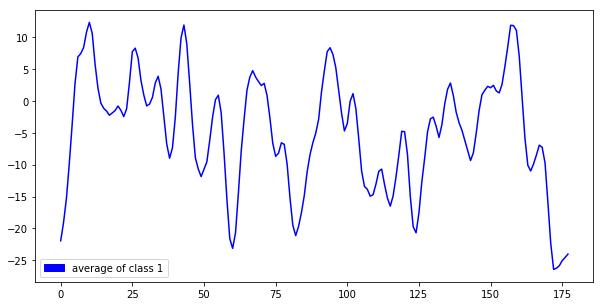

In [5]:
#visualizing class 1, averaged
data = [0] * 178 
count = 0
for row_num, row_data in df.iterrows():
    if row_data['y'] == 1:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1
average1 = [a/count for a in data]

print("class1:", count)
blue = mpatches.Patch(color='blue', label='average of class 1')
plt.figure(figsize=(10,5))
plt.legend(handles=[blue])
plt.plot(average1, 'b')

class2: 2300


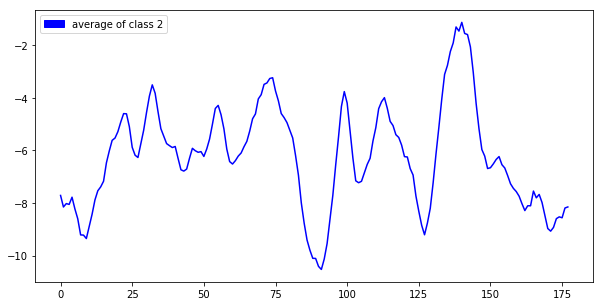

In [6]:
#visualizing class 2, averaged
data = [0] * 178 
count = 0
for row_num, row_data in df.iterrows():
    if row_data['y'] == 2:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1

print("class2:", count)
average2 = [a/count for a in data]
blue = mpatches.Patch(color='blue', label='average of class 2')
plt.figure(figsize=(10,5))
plt.legend(handles=[blue])
plt.plot(average2, 'b')

class3: 2300


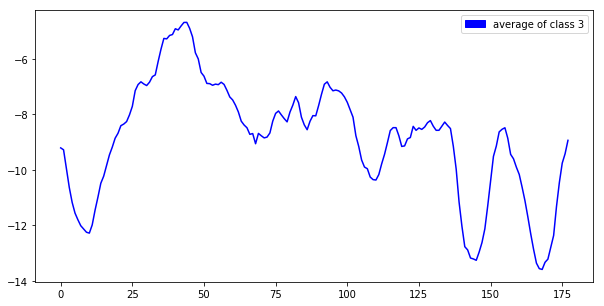

In [7]:
#visualizing class 3, averaged
data = [0] * 178 
count = 0
for row_num, row_data in df.iterrows():
    if row_data['y'] == 3:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1
average3 = [a/count for a in data]

print("class3:", count)
blue = mpatches.Patch(color='blue', label='average of class 3')
plt.figure(figsize=(10,5))
plt.legend(handles=[blue])
plt.plot(average3, 'b')

class4: 2300


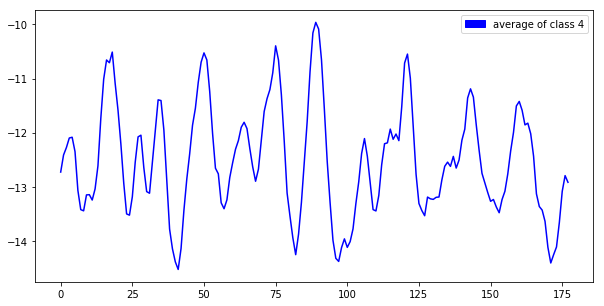

In [8]:
#visualizing class 4, averaged
data = [0] * 178 
count = 0
for row_num, row_data in df.iterrows():
    if row_data['y'] == 4:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1
average4 = [a/count for a in data]

print("class4:", count)
blue = mpatches.Patch(color='blue', label='average of class 4')
plt.figure(figsize=(10,5))
plt.legend(handles=[blue])
plt.plot(average4, 'b')

class5: 2300


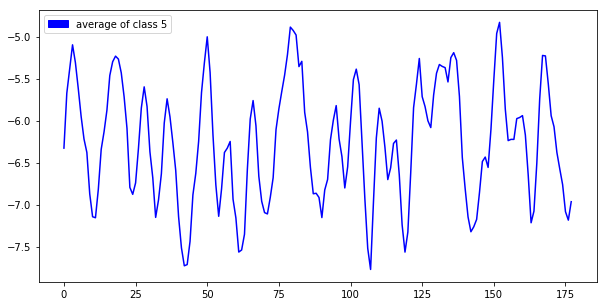

In [9]:
#visualizing class 5, averaged
data = [0] * 178 
count = 0
for row_num, row_data in df.iterrows():
    if row_data['y'] == 5:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1
average5 = [a/count for a in data]

print("class5:", count)
blue = mpatches.Patch(color='blue', label='average of class 5')
plt.figure(figsize=(10,5))
plt.legend(handles=[blue])
plt.plot(average5, 'b')

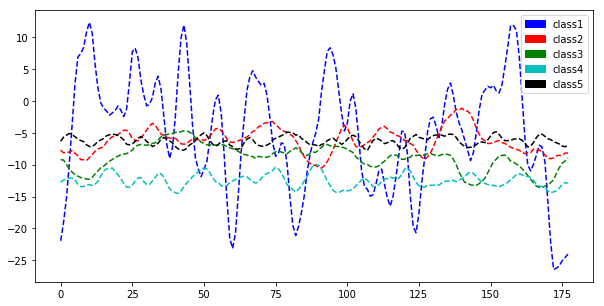

In [10]:
blue = mpatches.Patch(color='b', label='class1')
red = mpatches.Patch(color='r', label='class2')
green = mpatches.Patch(color='g', label='class3')
cyan = mpatches.Patch(color='c', label='class4')
black = mpatches.Patch(color='k', label='class5')

plt.figure(figsize=(10,5))
plt.legend(handles=[blue, red, green, cyan, black])
plt.plot(average1, 'b--', average2, 'r--', average3, 'g--', average4, 'c--', average5, 'k--')

In [11]:
#it looks like class1 is very different from all other classes in range. 
#let's collapse down to 2 classes and see how it looks and do some
#binary classification. 1 is seizure, 0 for all other classes
for i, row in df2.iterrows():
    value = 0
    if row['y'] == 1:
        value = 1
    df2.at[i, 'y'] = value
    
#changing DF1 to fit multiclass tf classifier. 
#going to reduce all classes by 1 so that 0: seizure, non-zero: non-seizure
for i, row in df.iterrows():
    value = row['y']
    value -= 1
    df.at[i, 'y'] = value

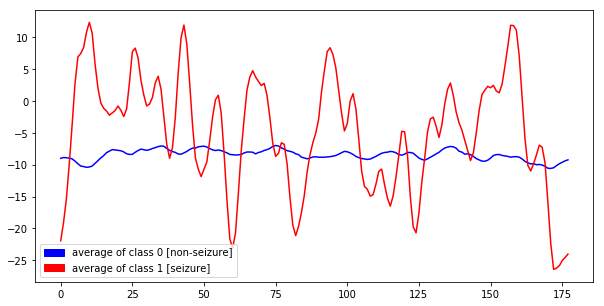

In [12]:
#visualizing non-seizure and seizure, all averaged
data = [0] * 178 
count = 0
for row_num, row_data in df2.iterrows():
    if row_data['y'] == 0:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1
average0 = [d/count for d in data]

data = [0] * 178
count = 0
for row_num, row_data in df2.iterrows():
    if row_data['y'] == 1:
        temp  = row_data[:-1]
        data = [a+b for (a,b) in zip(data, temp)]
        count +=1
average1 = [a/count for a in data]


blue = mpatches.Patch(color='blue', label='average of class 0 [non-seizure]')
red = mpatches.Patch(color='red', label='average of class 1 [seizure]')

plt.figure(figsize=(10,5))
plt.legend(handles=[blue, red])
plt.plot(average0, 'b')
plt.plot(average1, 'r')

# functions and data

In [13]:
C = [math.ceil(c * 1000000)/1000000 for c in np.logspace(-5,5,10)] #slack variable
T = np.linspace(0,0.7,7, endpoint=False)[1:] #time variables 
print("C:\t", C)
print("T:\t", T)

C:	 [1e-05, 0.00013, 0.001669, 0.021545, 0.278256, 3.593814, 46.415889, 599.484251, 7742.636827, 100000.0]
T:	 [0.1 0.2 0.3 0.4 0.5 0.6]


In [14]:
def get_indices(data_len):
    train_end = int(data_len * .6)
    valid_end = int(data_len * .75)
    
    return (train_end, valid_end)

In [15]:
#splitting into separate classes to build 1 vs [other] classifiers
data_list_mc = df.values.tolist()
data_mc      = df.drop('y', 1).values.tolist()
label_mc     = df['y'].values.tolist()

In [16]:
#splitting into separate classes to build seizure vs non-seizure  classifiers
data_list_sc = df2.values.tolist()
data_sc      = df2.drop('y', 1).values.tolist()
label_sc     = df2['y'].values.tolist()

In [17]:
train_len, valid_len = get_indices(len(data_sc))

train_x_sc, valid_x_sc, tests_x_sc = data_sc[:train_len], data_sc[train_len:valid_len], data_sc[valid_len:]
train_y_sc, valid_y_sc, tests_y_sc = label_sc[:train_len], label_sc[train_len:valid_len], label_sc[valid_len:]

train_x_mc, valid_x_mc, tests_x_mc = data_mc[:train_len], data_mc[train_len:valid_len], data_mc[valid_len:]
train_y_mc, valid_y_mc, tests_y_mc = label_mc[:train_len], label_mc[train_len:valid_len], label_mc[valid_len:]

# classifying multiple classes using linearSVM

In [30]:
from sklearn.svm import SVC, LinearSVC

In [31]:
data1 = [row[:] for row in data_list_mc if row[-1] == 0]
data2 = [row[:] for row in data_list_mc if row[-1] == 1]
data3 = [row[:] for row in data_list_mc if row[-1] == 2]
data4 = [row[:] for row in data_list_mc if row[-1] == 3]
data5 = [row[:] for row in data_list_mc if row[-1] == 4]

In [32]:
#1 vs 2 classifier data
class12 = data1 + data2
np.random.shuffle(class12)

data12  = [row[:-1] for row in class12]
label12 = [row[-1]  for row in class12]

(train_len, valid_len) = get_indices(len(data12))

train12 = data12[:train_len]
valid12 = data12[train_len:valid_len]
test12  = data12[valid_len:]

train12_y = label12[:train_len]
valid12_y = label12[train_len:valid_len]
test12_y  = label12[valid_len:]

In [33]:
#1 vs 3 data 
class13 = data1 + data3
np.random.shuffle(class13)

data13  = [row[:-1] for row in class13]
label13 = [row[-1]  for row in class13]

(train_len, valid_len) = get_indices(len(data13))

train13 = data13[:train_len]
valid13 = data13[train_len:valid_len]
test13  = data13[valid_len:]

train13_y = label13[:train_len]
valid13_y = label13[train_len:valid_len]
test13_y  = label13[valid_len:]

In [34]:
#1 vs 4 data
class14 = data1 + data4
np.random.shuffle(class14)

data14  = [row[:-1] for row in class14]
label14 = [row[-1]  for row in class14]

(train_len, valid_len) = get_indices(len(data14))

train14 = data14[:train_len]
valid14 = data14[train_len:valid_len]
test14  = data14[valid_len:]

train14_y = label14[:train_len]
valid14_y = label14[train_len:valid_len]
test14_y  = label14[valid_len:]

In [35]:
#1 vs 5 data
class15 = data1 + data5
np.random.shuffle(class15)

data15  = [row[:-1] for row in class15]
label15 = [row[-1]  for row in class15]

(train_len, valid_len) = get_indices(len(data15))

train15 = data15[:train_len]
valid15 = data15[train_len:valid_len]
test15  = data15[valid_len:]

train15_y = label15[:train_len]
valid15_y = label15[train_len:valid_len]
test15_y  = label15[valid_len:]

In [36]:
#1 vs 2 linear classifier
max_CT = {};

for time in T:
    print("using the first ", int(time*100), "% of data to train...")
    epoch = int(time * 178)
    
    train12_x = [row[:epoch] for row in train12]
    valid12_x = [row[:epoch] for row in valid12]
    test12_x  = [row[:epoch] for row in test12]
        
    max_acc, max_c = 0, 0;
    for c in C:
        print("C: ", c)
        svm12 = LinearSVC(C=c, max_iter = 75_000)
        svm12.fit(train12_x, train12_y)
        
        pred12_y = svm12.predict(valid12_x)
        valid_acc = sum(1 if pred == act else 0 for pred, act in zip(pred12_y, valid12_y)) * 1.0
        print("validation accuracy:\t", (valid_acc/len(valid12) * 100), "%")
        
        pred12_y = svm12.predict(test12_x)
        test_acc = sum(1 if pred == act else 0 for pred, act in zip(pred12_y, test12_y)) * 1.0
        acc = test_acc/len(test12) * 100
        if acc > max_acc: 
            max_acc = acc 
            max_c = c 
        print("Test accuracy:\t\t",  acc, "%\n")
    max_CT[time] = (max_c, max_acc)
    print("\n")
    
print("accuracy for class 1 vs class 2 classifier")
for i, (c,t) in max_CT.items():
    print(int(i*100), "%:\t", c,"\t", t)

using the first  10 % of data to train...
C:  1e-05
validation accuracy:	 53.188405797101446 %
Test accuracy:		 52.347826086956516 %

C:  0.00013
validation accuracy:	 55.94202898550724 %
Test accuracy:		 53.91304347826087 %

C:  0.001669
validation accuracy:	 60.0 %
Test accuracy:		 56.173913043478265 %

C:  0.021545
validation accuracy:	 60.86956521739131 %
Test accuracy:		 60.78260869565217 %

C:  0.278256
validation accuracy:	 63.6231884057971 %
Test accuracy:		 62.26086956521739 %

C:  3.593814
validation accuracy:	 62.31884057971014 %
Test accuracy:		 63.65217391304348 %

C:  46.415889
validation accuracy:	 62.7536231884058 %
Test accuracy:		 61.91304347826087 %

C:  599.484251
validation accuracy:	 63.6231884057971 %
Test accuracy:		 62.95652173913043 %

C:  7742.636827
validation accuracy:	 59.130434782608695 %
Test accuracy:		 58.434782608695656 %

C:  100000.0
validation accuracy:	 56.376811594202906 %
Test accuracy:		 57.130434782608695 %



using the first  20 % of data to 

In [ ]:
#AUROC for 1v2 classifier 
epoch = int(0.5 * 178)
train12_x = [row[:epoch] for row in train12]
test12_x  = [row[:epoch] for row in test12]

svm12 = LinearSVC(C=46.415889, max_iter=75_000)
svm12.fit(train12_x, train12_y)
pred12_y = svm12.predict(test12_x)

roc_auc_score(test12_y, pred12_y) 

In [38]:
#1 vs 3 linear classifier
max_CT = {};

for time in T:
    print("using the first ", int(time*100), "% of data to train...")
    epoch = int(time * 178)
    
    train13_x = [row[:epoch] for row in train13]
    valid13_x = [row[:epoch] for row in valid13]
    test13_x  = [row[:epoch] for row in test13]
        
    max_acc, max_c = 0, 0;
    for c in C:
        print("C: ", c)
        svm13 = LinearSVC(C=c, max_iter = 75_000)
        svm13.fit(train13_x, train13_y)
        
        pred13_y = svm13.predict(valid13_x)
        valid_acc = sum(1 if pred == act else 0 for pred, act in zip(pred13_y, valid13_y)) * 1.0
        print("validation accuracy:\t", (valid_acc/len(valid12) * 100), "%")
        
        pred13_y = svm13.predict(test13_x)
        test_acc = sum(1 if pred == act else 0 for pred, act in zip(pred13_y, test13_y)) * 1.0
        acc = test_acc/len(test13) * 100
        if acc > max_acc: 
            max_acc = acc 
            max_c = c 
        print("Test accuracy: \t\t",  acc, "%\n")
    max_CT[time] = (max_c, max_acc)
    print("\n")
    
print("accuracy for class 1 vs class 3 classifier")
for i, (c,t) in max_CT.items():
    print(int(i*100), "%:\t", c,"\t", t)

using the first  10 % of data to train...
C:  1e-05
validation accuracy:	 54.637681159420296 %
Test accuracy: 		 53.130434782608695 %

C:  0.00013
validation accuracy:	 56.376811594202906 %
Test accuracy: 		 56.086956521739125 %

C:  0.001669
validation accuracy:	 63.6231884057971 %
Test accuracy: 		 59.130434782608695 %

C:  0.021545
validation accuracy:	 61.73913043478261 %
Test accuracy: 		 58.34782608695652 %

C:  0.278256
validation accuracy:	 63.33333333333333 %
Test accuracy: 		 53.391304347826086 %

C:  3.593814
validation accuracy:	 64.6376811594203 %
Test accuracy: 		 59.39130434782609 %

C:  46.415889
validation accuracy:	 66.66666666666666 %
Test accuracy: 		 60.78260869565217 %

C:  599.484251
validation accuracy:	 72.7536231884058 %
Test accuracy: 		 63.91304347826087 %

C:  7742.636827
validation accuracy:	 66.95652173913044 %
Test accuracy: 		 58.608695652173914 %

C:  100000.0
validation accuracy:	 67.2463768115942 %
Test accuracy: 		 62.26086956521739 %



using the f

In [39]:
#AUROC for 1v3 classifier 
epoch = int(0.5 * 178)
train13_x = [row[:epoch] for row in train13]
test13_x  = [row[:epoch] for row in test13]

svm13 = LinearSVC(C=7742.636827, max_iter=75_000)
svm13.fit(train13_x, train13_y)
pred13_y = svm13.predict(test13_x)

roc_auc_score(test13_y, pred13_y) 

0.6531651902286648

In [40]:
#1 vs 4 linear classifier
max_CT = {};

for time in T:
    print("using the first ", int(time*100), "% of data to train...")
    epoch = int(time * 178)
    
    train14_x = [row[:epoch] for row in train14]
    valid14_x = [row[:epoch] for row in valid14]
    test14_x  = [row[:epoch] for row in test14]
        
    max_acc, max_c = 0, 0;
    for c in C:
        print("C: ", c)
        svm14 = LinearSVC(C=c, max_iter = 75_000)
        svm14.fit(train14_x, train14_y)
        
        pred14_y = svm14.predict(valid14_x)
        valid_acc = sum(1 if pred == act else 0 for pred, act in zip(pred14_y, valid14_y)) * 1.0
        print("validation accuracy:\t", (valid_acc/len(valid14) * 100), "%")
        
        pred14_y = svm14.predict(test14_x)
        test_acc = sum(1 if pred == act else 0 for pred, act in zip(pred14_y, test14_y)) * 1.0
        acc = test_acc/len(test14) * 100
        if acc > max_acc: 
            max_acc = acc 
            max_c = c 
        print("Test accuracy: \t\t",  acc, "%\n")
    max_CT[time] = (max_c, max_acc)
    print("\n")
    
print("accuracy for class 1 vs class 4 classifier")
for i, (c,t) in max_CT.items():
    print(int(i*100), "%:\t", c,"\t", t)

using the first  10 % of data to train...
C:  1e-05
validation accuracy:	 50.0 %
Test accuracy: 		 51.73913043478261 %

C:  0.00013
validation accuracy:	 50.43478260869565 %
Test accuracy: 		 52.8695652173913 %

C:  0.001669
validation accuracy:	 49.85507246376812 %
Test accuracy: 		 53.91304347826087 %

C:  0.021545
validation accuracy:	 58.69565217391305 %
Test accuracy: 		 56.95652173913044 %

C:  0.278256
validation accuracy:	 59.56521739130435 %
Test accuracy: 		 59.130434782608695 %

C:  3.593814
validation accuracy:	 63.18840579710145 %
Test accuracy: 		 64.0 %

C:  46.415889
validation accuracy:	 56.811594202898554 %
Test accuracy: 		 56.434782608695656 %

C:  599.484251
validation accuracy:	 57.971014492753625 %
Test accuracy: 		 56.869565217391305 %

C:  7742.636827
validation accuracy:	 66.52173913043478 %
Test accuracy: 		 67.73913043478261 %

C:  100000.0
validation accuracy:	 59.56521739130435 %
Test accuracy: 		 57.652173913043484 %



using the first  20 % of data to tr

KeyboardInterrupt: 

In [ ]:
#AUROC for 1v3 classifier 
epoch = int(0.5 * 178)
train14_x = [row[:epoch] for row in train14]
test14_x  = [row[:epoch] for row in test14]

svm14 = LinearSVC(C=46.415889, max_iter=75_000)
svm14.fit(train14_x, train14_y)
pred14_y = svm14.predict(test14_x)

roc_auc_score(test14_y, pred14_y) 

In [ ]:
#1 vs 5 linear classifier
max_CT = {};

for time in T:
    print("using the first ", int(time*100), "% of data to train...")
    epoch = int(time * 178)
    
    train15_x = [row[:epoch] for row in train15]
    valid15_x = [row[:epoch] for row in valid15]
    test15_x  = [row[:epoch] for row in test15]
        
    max_acc, max_c = 0, 0;
    for c in C:
        print("C: ", c)
        svm15 = LinearSVC(C=c, max_iter = 75_000)
        svm15.fit(train15_x, train15_y)
        
        pred15_y = svm15.predict(valid15_x)
        valid_acc = sum(1 if pred == act else 0 for pred, act in zip(pred15_y, valid15_y)) * 1.0
        print("validation accuracy:\t", (valid_acc/len(valid15) * 100), "%")
        
        pred15_y = svm15.predict(test15_x)
        test_acc = sum(1 if pred == act else 0 for pred, act in zip(pred15_y, test15_y)) * 1.0
        acc = test_acc/len(test15) * 100
        if acc > max_acc: 
            max_acc = acc 
            max_c = c 
        print("Test accuracy: \t\t",  acc, "%\n")
    max_CT[time] = (max_c, max_acc)
    print("\n")
    
print("accuracy for class 1 vs class 5 classifier")
for i, (c,t) in max_CT.items():
    print(int(i*100), "%:\t", c,"\t", t)

In [ ]:
#AUROC for 1v5 classifier 
epoch = int(0.5 * 178)
train15_x = [row[:epoch] for row in train15]
test15_x  = [row[:epoch] for row in test15]

svm15 = LinearSVC(C=10_000, max_iter=75_000)
svm15.fit(train15_x, train15_y)
pred15_y = svm15.predict(test15_x)

roc_auc_score(test13_y, pred13_y) 

In [ ]:
# lets fit the linear SVCs for 50% of the data @ their respective C 
epoch = int(.5 * 178)
train12_x = [row[:epoch] for row in train12]
train13_x = [row[:epoch] for row in train13]
train14_x = [row[:epoch] for row in train14]
train15_x = [row[:epoch] for row in train15]
    
svc12 = LinearSVC(C=46.415889, max_iter = 25_000)
svc13 = LinearSVC(C=3.593814,  max_iter = 25_000)
svc14 = LinearSVC(C=3.593814,  max_iter = 25_000)
svc15 = LinearSVC(C=10000,     max_iter = 25_000)

svc12.fit(train12_x, train12_y)
svc13.fit(train13_x, train13_y)
svc14.fit(train14_x, train14_y)
svc15.fit(train15_x, train15_y)

In [ ]:
SVCs = [0, svc12, svc13, svc14, svc15]

# classifying multiple classes using KNN classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#KNN for multiclass classification
for time in T: 
    print("using", int(time*100), "% of data", end='\t\t')
    epoch = int(time * 178)
    train_x = [row[:epoch] for row in data_mc[:train_len]]
    valid_x = [row[:epoch] for row in data_mc[train_len:valid_len]]
    tests_x = [row[:epoch] for row in data_mc[valid_len:]]
    
    train_y = label_mc[:train_len]
    valid_y = label_mc[train_len:valid_len]
    tests_y = label_mc[valid_len:]
        
    nbrs = KNeighborsClassifier(n_neighbors=4, algorithm='auto').fit(train_x, train_y)
    acc = sum([1.0 if pred == act else 0 for (pred, act) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
    print("accuracy: ", acc*100, "%\n")

using 10 % of data		accuracy:  46.43478260869565 %

using 20 % of data		accuracy:  47.40869565217392 %

using 30 % of data		accuracy:  47.791304347826085 %

using 40 % of data		accuracy:  47.96521739130435 %

using 49 % of data		accuracy:  48.38260869565217 %

using 60 % of data		accuracy:  46.81739130434783 %



So we see two things from this approach:

1) Accuracy is pretty bad in general. It doesn't classify into the multiple classes well at all, so we should try something a little bit different, maybe use the squashed 2 class data set?

2) Accuracy doesn't change much when decreasing data size. Maybe we can use very little data and get pretty accurate.

In [20]:
#KNN for 2 class classification
for time in T: 
    print("using", int(time*100), "% of data", end='\t\t')
    epoch = int(time * 178)
    train_x = [row[:epoch] for row in data_sc[:train_len]]
    valid_x = [row[:epoch] for row in data_sc[train_len:valid_len]]
    tests_x = [row[:epoch] for row in data_sc[valid_len:]]
    
    train_y = label_sc[:train_len]
    valid_y = label_sc[train_len:valid_len]
    tests_y = label_sc[valid_len:]
        
    nbrs = KNeighborsClassifier(n_neighbors=4, algorithm='auto').fit(train_x, train_y)
    acc = sum([1.0 if pred == act else 0 for (pred, act) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
    print("accuracy: ", acc*100, "%\n")

using 10 % of data		accuracy:  92.20869565217392 %

using 20 % of data		accuracy:  93.07826086956523 %

using 30 % of data		accuracy:  93.04347826086956 %

using 40 % of data		accuracy:  92.76521739130435 %

using 49 % of data		accuracy:  92.55652173913043 %

using 60 % of data		accuracy:  91.96521739130435 %



In [21]:
#now we can try to minimize data we need
partial_sizes = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8];

for partial_size in partial_sizes: 
    print("using", int(partial_size*100), "% of data", end='\t\t')
    epoch = int(partial_size * 178)
    train_x = [row[:epoch] for row in data_sc[:train_len]]
    valid_x = [row[:epoch] for row in data_sc[train_len:valid_len]]
    tests_x = [row[:epoch] for row in data_sc[valid_len:]]
    
    train_y = label_sc[:train_len]
    valid_y = label_sc[train_len:valid_len]
    tests_y = label_sc[valid_len:]
        
    nbrs = KNeighborsClassifier(n_neighbors=4, algorithm='auto').fit(train_x, train_y)
    acc = sum([1.0 if pred == act else 0 for (pred, act) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
    print("accuracy: ", acc*100, "%\n")

using 1 % of data		accuracy:  86.67826086956522 %

using 5 % of data		accuracy:  90.67826086956522 %

using 10 % of data		accuracy:  92.20869565217392 %

using 15 % of data		accuracy:  93.18260869565216 %

using 20 % of data		accuracy:  93.07826086956523 %

using 50 % of data		accuracy:  92.52173913043478 %

using 80 % of data		accuracy:  91.54782608695652 %



In [22]:
# It looks like we stop getting a useful improvement after about 10% of the training data size
# That's only about 17 data entries, pretty good!
partial_size = 0.10

neighbors = [2, 5, 10, 20, 50]
print ("Using ", partial_size*100,"% of the data")

for k in neighbors:
    print("Using K: ", k)
    epoch = int(partial_size * 178)
    train_x = [row[:epoch] for row in data_sc[:train_len]]
    valid_x = [row[:epoch] for row in data_sc[train_len:valid_len]]
    tests_x = [row[:epoch] for row in data_sc[valid_len:]]

    train_y = label_sc[:train_len]
    valid_y = label_sc[train_len:valid_len]
    tests_y = label_sc[valid_len:]

    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(train_x, train_y)
    acc = sum([1.0 if pred == act else 0 for (pred, act) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
    print("accuracy: ", acc*100, "%\n")

Using  10.0 % of the data
Using K:  2
accuracy:  91.47826086956522 %

Using K:  5
accuracy:  92.55652173913043 %

Using K:  10
accuracy:  92.45217391304348 %

Using K:  20
accuracy:  92.20869565217392 %

Using K:  50
accuracy:  91.4086956521739 %



### K = around 5 seems to work best and accuracy seems to drop as k increases

lets try k = [2..10] to fine tune this

In [23]:
partial_size = 0.10

neighbors = [2, 3, 4, 5, 6, 7, 8, 9, 10]
print ("Using ", partial_size*100,"% of the data")

for k in neighbors:
    print("Using K: ", k)
    epoch = int(partial_size * 178)
    train_x = [row[:epoch] for row in data_sc[:train_len]]
    valid_x = [row[:epoch] for row in data_sc[train_len:valid_len]]
    tests_x = [row[:epoch] for row in data_sc[valid_len:]]

    train_y = label_sc[:train_len]
    valid_y = label_sc[train_len:valid_len]
    tests_y = label_sc[valid_len:]

    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(train_x, train_y)
    acc = sum([1.0 if pred == act else 0 for (pred, act) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
    print("accuracy: ", acc*100, "%\n")

Using  10.0 % of the data
Using K:  2
accuracy:  91.47826086956522 %

Using K:  3
accuracy:  92.0695652173913 %

Using K:  4
accuracy:  92.20869565217392 %

Using K:  5
accuracy:  92.55652173913043 %

Using K:  6
accuracy:  92.62608695652173 %

Using K:  7
accuracy:  92.7304347826087 %

Using K:  8
accuracy:  92.41739130434783 %

Using K:  9
accuracy:  92.76521739130435 %

Using K:  10
accuracy:  92.45217391304348 %



In [24]:
partial_size = 0.10
k = 5

print("Using ", partial_size*100,"% of the data")
print("Using K: ", k)

epoch = int(partial_size * 178)
train_x = [row[:epoch] for row in data_sc[:train_len]]
valid_x = [row[:epoch] for row in data_sc[train_len:valid_len]]
tests_x = [row[:epoch] for row in data_sc[valid_len:]]

train_y = label_sc[:train_len]
valid_y = label_sc[train_len:valid_len]
tests_y = label_sc[valid_len:]

nbrs = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(train_x, train_y)

## final results
acc = sum([1.0 if pred == act else 0 for (pred, act) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
false_pos = sum([1.0 if (acc != pred and pred == 1) else 0 for (acc, pred) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
false_neg = sum([1.0 if (acc != pred and pred == 0) else 0 for (acc, pred) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
true_pos  = sum([1.0 if (acc == pred and pred == 1) else 0 for (acc, pred) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)
true_neg  = sum([1.0 if (acc == pred and pred == 0) else 0 for (acc, pred) in zip(nbrs.predict(tests_x), tests_y)])/len(tests_x)

print("accuracy: ", acc*100, "%\n")
print("False Positives: ", false_pos*100, "%");
print("False Negatives: ", false_neg*100, "%");
print("True Positives: ", true_pos*100, "%");
print("True Negatives: ", true_neg*100, "%");

Using  10.0 % of the data
Using K:  5
accuracy:  92.55652173913043 %

False Positives:  5.739130434782608 %
False Negatives:  1.7043478260869567 %
True Positives:  14.052173913043479 %
True Negatives:  78.50434782608696 %


### Results
Looks like K=5 neighbors works best, and we were able to optimize down to using only 10% of the data length, since each 178 data entries represents about 1 second, this means we have trained our classifier to detect seizures in our test data with about 92% accuracy and samples of length about a tenth of a second.

Even more promising is that the rate of false negatives is about 1%. If the test set is representative of real data, this means that very few seizures will be missed, which is good because to err on the side of caution than miss a seizure.

# Binary classification using LDA 

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
LDA = LinearDiscriminantAnalysis()

In [27]:
LDA.fit(train_x_sc, train_y_sc)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [28]:
LDA_pred = LDA.predict(tests_x_sc)
print(LDA_pred)

[0 0 1 ... 0 0 0]


In [29]:
acc = sum([1.0 if acc == pred else 0 for (acc, pred) in zip(tests_y_sc, LDA_pred)])/len(tests_y_sc)
false_pos = sum([1.0 if (acc != pred and pred == 1) else 0 for (acc, pred) in zip(tests_y_sc, LDA_pred)])/len(tests_y_sc)
false_neg = sum([1.0 if (acc != pred and pred == 0) else 0 for (acc, pred) in zip(tests_y_sc, LDA_pred)])/len(tests_y_sc)
true_pos  = sum([1.0 if (acc == pred and pred == 1) else 0 for (acc, pred) in zip(tests_y_sc, LDA_pred)])/len(tests_y_sc)
true_neg  = sum([1.0 if (acc == pred and pred == 0) else 0 for (acc, pred) in zip(tests_y_sc, LDA_pred)])/len(tests_y_sc)

In [30]:
print("LDA accuracy: ", acc*100, "%")
print("True Positives: ", )

print("False Positives: ", false_pos*100, "%");
print("False Negatives: ", false_neg*100, "%");
print("True Positives: ", true_pos*100, "%");
print("True Negatives: ", true_neg*100, "%");

LDA accuracy:  82.71304347826087 %
True Positives: 
False Positives:  0.34782608695652173 %
False Negatives:  16.93913043478261 %
True Positives:  2.8521739130434782 %
True Negatives:  79.8608695652174 %


#### LDA seems be naive classification (saying none-seizure to most things since data is 4:1)

# binary classification using tf-ANN 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#binary class classifier [seizure vs non-seizure]
epoch1 = int(.5 * 178) #178 samples, lets take the first 50% and establish some baseline 

train_x_tf = train_x_sc
train_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in train_x_tf])

test_x_tf = tests_x_sc
test_x_tf = np.asarray([np.asarray(l)[:epoch1] for l in test_x_tf])

In [ ]:
#this works pretty well :) 
model = keras.Sequential([
    keras.layers.Dense(epoch1, activation=tf.nn.elu),
    keras.layers.Dense(120,    activation=tf.nn.elu),
    keras.layers.Dense(100,    activation=tf.nn.elu),
    keras.layers.Dense(80,     activation=tf.nn.elu),
    keras.layers.Dense(60,     activation=tf.nn.elu),
    keras.layers.Dense(50,     activation=tf.nn.elu),
    keras.layers.Dense(40,     activation=tf.nn.elu),
    keras.layers.Dense(20,     activation=tf.nn.elu),
    keras.layers.Dense(2,      activation=tf.nn.softmax),
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x_tf, np.asarray(train_y_sc), epochs=100)

In [ ]:
test_loss, test_acc = model.evaluate(test_x_tf, np.asarray(tests_y_sc))

print('Test accuracy:', test_acc)

In [ ]:
#lets automate it and test over many time slices 
max_acc = 0.00
for time in T:
    epoch1 = int(time * 178) #178 samples, lets take the first time% and see how well we do 

    train_x_tf = train_x_sc.copy()
    train_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in train_x_tf])
    train_y_tf = np.asarray(train_y_sc)

    test_x_tf = tests_x_sc.copy()
    test_x_tf = np.asarray([np.asarray(l)[:epoch1] for l in test_x_tf])
    test_y_tf = np.asarray(tests_y_sc)
    print("using the first ", time*100, "% of data to train", "\nNumber of datapoints used: ", epoch1)
    
    #model that's been proven to work 
    model = keras.Sequential([
        keras.layers.Dense(epoch1, activation=tf.nn.elu),
        keras.layers.Dense(120,    activation=tf.nn.elu),
        keras.layers.Dense(100,    activation=tf.nn.elu),
        keras.layers.Dense(80,     activation=tf.nn.elu),
        keras.layers.Dense(60,     activation=tf.nn.elu),
        keras.layers.Dense(50,     activation=tf.nn.elu),
        keras.layers.Dense(40,     activation=tf.nn.elu),
        keras.layers.Dense(20,     activation=tf.nn.elu),
        keras.layers.Dense(2,      activation=tf.nn.softmax),
    ])

    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(train_x_tf, train_y_tf, epochs=50)
    print("")
    test_loss, test_acc = model.evaluate(test_x_tf, test_y_tf)
    max_acc = max_acc if max_acc > test_acc else test_acc
    
    print('Test accuracy:', test_acc, "\tTest loss:", test_loss)
    print("\n\n")

print("Highest accuracy: ", max_acc) #hopefully within the first 50% of the dataset

In [ ]:
#lets also choose 50% for binary ANN since it's what the binary SVCs use
#binary class classifier [seizure vs non-seizure]
epoch1 = int(.5 * 178) 

train_x_tf = train_x_sc
train_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in train_x_tf])

train_y_tf = np.asarray(train_y_sc)
test_y_tf = np.asarray(tests_y_sc)

#this works pretty well :) 
model = keras.Sequential([
    keras.layers.Dense(epoch1, activation=tf.nn.elu),
    keras.layers.Dense(120,    activation=tf.nn.elu),
    keras.layers.Dense(100,    activation=tf.nn.elu),
    keras.layers.Dense(80,     activation=tf.nn.elu),
    keras.layers.Dense(60,     activation=tf.nn.elu),
    keras.layers.Dense(50,     activation=tf.nn.elu),
    keras.layers.Dense(40,     activation=tf.nn.elu),
    keras.layers.Dense(20,     activation=tf.nn.elu),
    keras.layers.Dense(2,      activation=tf.nn.softmax),
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x_tf, train_y_tf, epochs=100)

In [ ]:
tests_x_tf = tests_x_sc
tests_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in tests_x_tf])

predictions = model.predict_classes(tests_x_tf)
roc_auc_score(tests_y_sc, predictions)

# multiclass tf-ANN classifier

In [ ]:
#multiclass ANN classifier 
train_end, valid_end = get_indices(len(data))

epoch1 = int(.5 * 178) #178 samples, lets take the first 50% and see how we do 

train_x_tf = np.asarray([l[:epoch1] for l in train_x_mc])
valid_x_tf = np.asarray([l[:epoch1] for l in valid_x_mc])
tests_x_tf = np.asarray([l[:epoch1] for l in tests_x_mc])

In [ ]:
#this worked pretty well for single class
#changing the output layer to 5 neurons to reflect 5 classes
model = keras.Sequential([
    keras.layers.Dense(epoch1, activation=tf.nn.elu),
    keras.layers.Dense(120,    activation=tf.nn.elu),
    keras.layers.Dense(100,    activation=tf.nn.elu),
    keras.layers.Dense(80,     activation=tf.nn.elu),
    keras.layers.Dense(60,     activation=tf.nn.elu),
    keras.layers.Dense(50,     activation=tf.nn.elu),
    keras.layers.Dense(40,     activation=tf.nn.elu),
    keras.layers.Dense(20,     activation=tf.nn.elu),
    keras.layers.Dense(5,      activation=tf.nn.softmax),
])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x_tf, np.asarray(train_y_mc), epochs=100)

In [ ]:
_, valid_acc = model.evaluate(valid_x_tf, valid_y_mc)
print('Test accuracy:', valid_acc)

_, test_acc = model.evaluate(tests_x_tf, tests_y_mc)
print('Test accuracy:', test_acc)

In [ ]:
#it looks like the ANN is overfitting on multiclass classification 

In [ ]:
for time in T:
    epoch1 = int(time * 178) #178 samples, lets take the first time% and see how well we do 
    print("using the first ", int(time*100), "% of data to train", "\nNumber of datapoints used: ", epoch1)
    
    #subsetting data from each row
    train_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in train_x_mc])
    valid_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in valid_x_mc])
    tests_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in tests_x_mc])
    
    #model that's been proven to work, trimmed a little bit to reduce overfitting
    model = keras.Sequential([
        keras.layers.Dense(epoch1,             activation=tf.nn.elu),
        keras.layers.Dense(int(epoch1*.66),    activation=tf.nn.elu),
        keras.layers.Dense(125,                activation=tf.nn.elu),
        keras.layers.Dense(125,                activation=tf.nn.elu),
        keras.layers.Dense(25,                 activation=tf.nn.elu),
        keras.layers.Dense(5,                  activation=tf.nn.softmax),
    ])
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(train_x_tf, np.asarray(train_y_mc), epochs=100)
    print("")
    valid_loss, valid_acc = model.evaluate(valid_x_tf, np.asarray(valid_y_mc))
    print('Validation accuracy:', valid_acc, "\tValidation loss:", valid_loss)
    
    tests_loss, tests_acc = model.evaluate(tests_x_tf, np.asarray(tests_y_mc))
    print('Test accuracy:', tests_acc, "\tTest loss:", tests_loss)
    print("\n\n")

# multiclass tf-ANN -> LinearSVC -> binary output

In [ ]:
# for multiclass, i cant seem to get the accuracy above 60% (using up 50% of the data)
# maybe if i combine the output of ANN to another classifier? 
# ANN(data) -> binary_classifier_1_vs_ANN_OUT(data) -> binary output 

epoch1 = int(.5 * 178) #178 samples, lets take the first time% and see how well we do 
print("using the first 50% of data to train", "\nNumber of datapoints used: ", epoch1)

#subsetting data from each row
train_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in train_x_mc])
valid_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in valid_x_mc])
tests_x_tf = np.asarray([np.asarray(l[:epoch1]) for l in tests_x_mc])

#model that's been proven to work, trimmed a little bit to reduce overfitting
model = keras.Sequential([
    keras.layers.Dense(epoch1,             activation=tf.nn.elu),
    keras.layers.Dense(int(epoch1*.66),    activation=tf.nn.elu),
    keras.layers.Dense(125,                activation=tf.nn.elu),
    keras.layers.Dense(125,                activation=tf.nn.elu),
    keras.layers.Dense(25,                 activation=tf.nn.elu),
    keras.layers.Dense(5,                  activation=tf.nn.softmax),
])
    
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x_tf, np.asarray(train_y_mc), epochs=100)

In [ ]:
result = model.predict_classes(tests_x_tf, len(tests_x_tf))

In [ ]:
predictions = []
for datum, res in zip(tests_x_tf, result): 
    if res == 0:
        temp_preds = []
        for svm in SVCs[1:]:
            temp_preds.append(svm.predict(datum.reshape(1,-1)))
        if len(np.unique(temp_preds)) > 2:
            predictions.append(1)
        else:
            predictions.append(0)
    else:
        predictions.append(0)
    
sum([1.0 if pred == act else 0 for (pred, act) in zip(predictions, tests_y_sc)])/len(tests_y_mc)

In [ ]:
roc_auc_score(tests_y_sc, predictions)

# Logistic Regression

In [ ]:
#Logisical Regression Classifier
from sklearn.linear_model import LogisticRegression

#Binary Classification with logistic regression
msk = int(len(df2) * .6)
train = df2[:msk]
test = df2[msk:]
train_x = (train.drop('y',1))
train_y = train['y']

test_x = test.drop('y', 1)
test_y = test['y']

lr = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
lr.fit(train_x, train_y)
acc = lr.score(test_x, test_y)
print("Overall Accuracy: ", acc*100, "%")